# **CODIGO INTERFAZ TFM**
---
- **Diseño e implementación de modelos de Inteligencia Artificial para la identificación temprana de pacientes con riesgo de sufrir ataques cardíacos**
---
- **Elaborado por Jon Maestre Escobar**
- **Máster Universitario en Inteligencia Artificial**
- **Universidad Alfonso X El Sabio**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

heartAttackPrediction_India = pd.read_csv('../Codigo/heart_attack_prediction_india.csv')
heartAttackPrediction_India.fillna(0, inplace=True)
heartAttackPrediction_India.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [2]:
# Variables categóricas binarias (0/1)
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Variables numéricas continuas
numeric_vars = [
    'Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
    'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level',
    'Emergency_Response_Time', 'Annual_Income'
]

---
---
---
---

### **Variable Alto Riesgo Clinico de Ataque Cardiaco**

In [3]:
# Convertir variables binarias a 1/0
binarias = ['Heart_Attack_History', 'Heart_Attack_Risk', 'Hypertension', 'Diabetes', 'Obesity',
            'Family_History', 'Smoking', 'Alcohol_Consumption', 'Air_Pollution_Exposure']
heartAttackPrediction_India[binarias] = heartAttackPrediction_India[binarias].replace({'Yes': 1, 'No': 0})

# Crear columnas auxiliares con condiciones numéricas discretizadas
heartAttackPrediction_India['Cond_Colesterol_Alto'] = (heartAttackPrediction_India['Cholesterol_Level'] >= 240).astype(int)
heartAttackPrediction_India['Cond_Tension_Sistolica'] = (heartAttackPrediction_India['Systolic_BP'] >= 140).astype(int)
heartAttackPrediction_India['Cond_Tension_Diastolica'] = (heartAttackPrediction_India['Diastolic_BP'] >= 90).astype(int)
heartAttackPrediction_India['Cond_Dieta_Mala'] = (heartAttackPrediction_India['Diet_Score'] < 7).astype(int)
heartAttackPrediction_India['Cond_Estres_Alto'] = (heartAttackPrediction_India['Stress_Level'] > 7).astype(int)
heartAttackPrediction_India['Cond_Edad_Avanzada'] = (heartAttackPrediction_India['Age'] > 60).astype(int)

# Sumar factores de riesgo (binarios + numéricos)
factores_totales = heartAttackPrediction_India[
    ['Hypertension', 'Diabetes', 'Obesity', 'Family_History', 'Smoking', 'Alcohol_Consumption',
     'Air_Pollution_Exposure', 'Cond_Colesterol_Alto', 'Cond_Tension_Sistolica',
     'Cond_Tension_Diastolica', 'Cond_Dieta_Mala', 'Cond_Estres_Alto', 'Cond_Edad_Avanzada']
].sum(axis=1)

# Definir variable de alto riesgo clínico
heartAttackPrediction_India['High_Clinical_Risk'] = (
    (heartAttackPrediction_India['Heart_Attack_History'] == 1) |
    (factores_totales >= 6)
).astype(int)

heartAttackPrediction_India['High_Clinical_Risk'].value_counts()

High_Clinical_Risk
0    6048
1    3952
Name: count, dtype: int64

In [4]:
heartAttackPrediction_India.to_csv('HeartAttackPredictionIndia_Updated.csv', index=False)

In [2]:
HeartAttackPredictionIndia_Updated = pd.read_csv('../Codigo/HeartAttackPredictionIndia_Updated.csv')
HeartAttackPredictionIndia_Updated.fillna(0, inplace=True)
HeartAttackPredictionIndia_Updated.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Annual_Income,Health_Insurance,Heart_Attack_Risk,Cond_Colesterol_Alto,Cond_Tension_Sistolica,Cond_Tension_Diastolica,Cond_Dieta_Mala,Cond_Estres_Alto,Cond_Edad_Avanzada,High_Clinical_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,611025,0,0,1,0,1,0,0,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,174527,0,0,1,0,1,1,0,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,1760112,1,0,1,0,1,1,1,1,1
3,4,Odisha,58,Male,1,0,1,0,0,1,...,1398213,0,0,0,0,0,0,0,0,1
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,97987,0,1,1,1,1,1,1,0,0


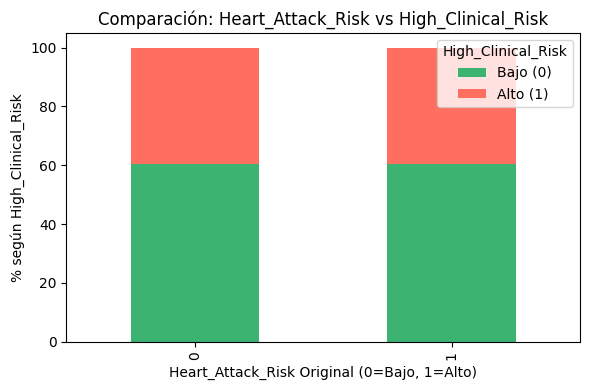

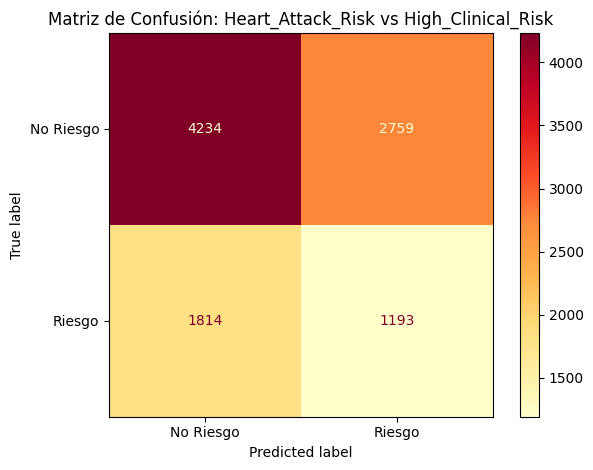

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualización comparativa con la etiqueta original 
fig, ax = plt.subplots(figsize=(6, 4))
comparacion = pd.crosstab(heartAttackPrediction_India['Heart_Attack_Risk'], heartAttackPrediction_India['High_Clinical_Risk'], normalize='index') * 100
comparacion.plot(kind='bar', stacked=True, color=['#3CB371', '#FF6F61'], ax=ax)
plt.title('Comparación: Heart_Attack_Risk vs High_Clinical_Risk')
plt.xlabel('Heart_Attack_Risk Original (0=Bajo, 1=Alto)')
plt.ylabel('% según High_Clinical_Risk')
plt.legend(['Bajo (0)', 'Alto (1)'], title='High_Clinical_Risk')
plt.tight_layout()
plt.show()

# Matriz de confusión entre ambas etiquetas 
y_true = heartAttackPrediction_India['Heart_Attack_Risk']
y_pred = heartAttackPrediction_India['High_Clinical_Risk']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Riesgo', 'Riesgo'])
disp.plot(cmap='YlOrRd')
plt.title('Matriz de Confusión: Heart_Attack_Risk vs High_Clinical_Risk')
plt.tight_layout()
plt.show()

---
---
---
---

### **MODELO DE MACHINE LEARNING EMPLEADO**

**XGBoost**

Fitting 3 folds for each of 25 candidates, totalling 75 fits

XGBoost - Evaluación final
AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1210    0]
 [   0  790]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Mejores hiperparámetros: {'colsample_bytree': 0.9439761626945282, 'learning_rate': 0.14606150771755597, 'max_depth': 3, 'n_estimators': 266, 'subsample': 0.6053059844639466}


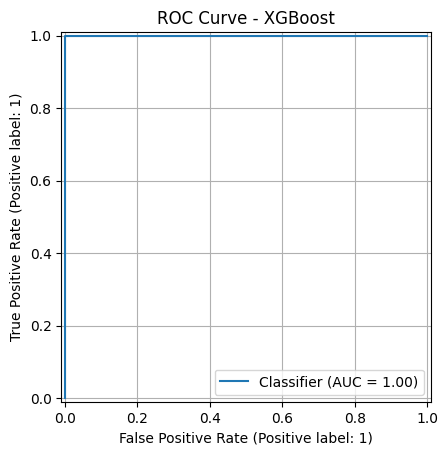

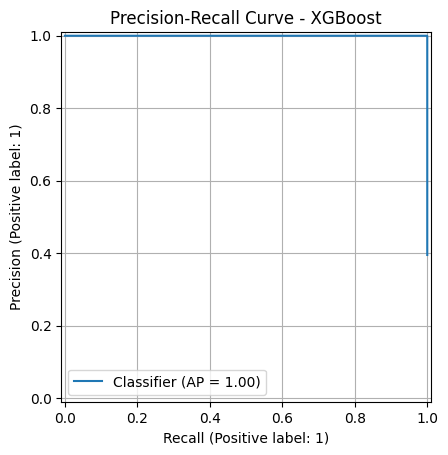


Modelo, scaler y columnas guardados correctamente.


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

# ----------------------------
# 1. PREPROCESADO
# ----------------------------
X = HeartAttackPredictionIndia_Updated.drop(columns=['Heart_Attack_Risk', 'High_Clinical_Risk'])
y = HeartAttackPredictionIndia_Updated['High_Clinical_Risk']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Guardar columnas para la futura predicción
columnas_modelo = X.columns.tolist()

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# ----------------------------
# 2. OPTIMIZACIÓN DE XGBOOST
# ----------------------------
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=42
)

search.fit(X_train_bal, y_train_bal)
mejor_modelo = search.best_estimator_

# ----------------------------
# 3. EVALUACIÓN
# ----------------------------
y_pred_prob = mejor_modelo.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nXGBoost - Evaluación final")
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Mejores hiperparámetros:", search.best_params_)

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('ROC Curve - XGBoost')
plt.grid(True)
plt.show()

# PR Curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob)
plt.title('Precision-Recall Curve - XGBoost')
plt.grid(True)
plt.show()

# ------------------------------------------
# 4. GUARDAR MODELO, SCALER Y COLUMNAS
# ------------------------------------------
joblib.dump(mejor_modelo, "modelo_xgboost.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(columnas_modelo, "columnas_modelo.pkl")
print("\nModelo, scaler y columnas guardados correctamente.")

---
---
---
---

### **INTERFAZ GRAFICA COMPLETA**

SystemExit: 0

RuntimeError: wrapped C/C++ object of type MplCanvas has been deleted

<Figure size 1874x480 with 1 Axes>

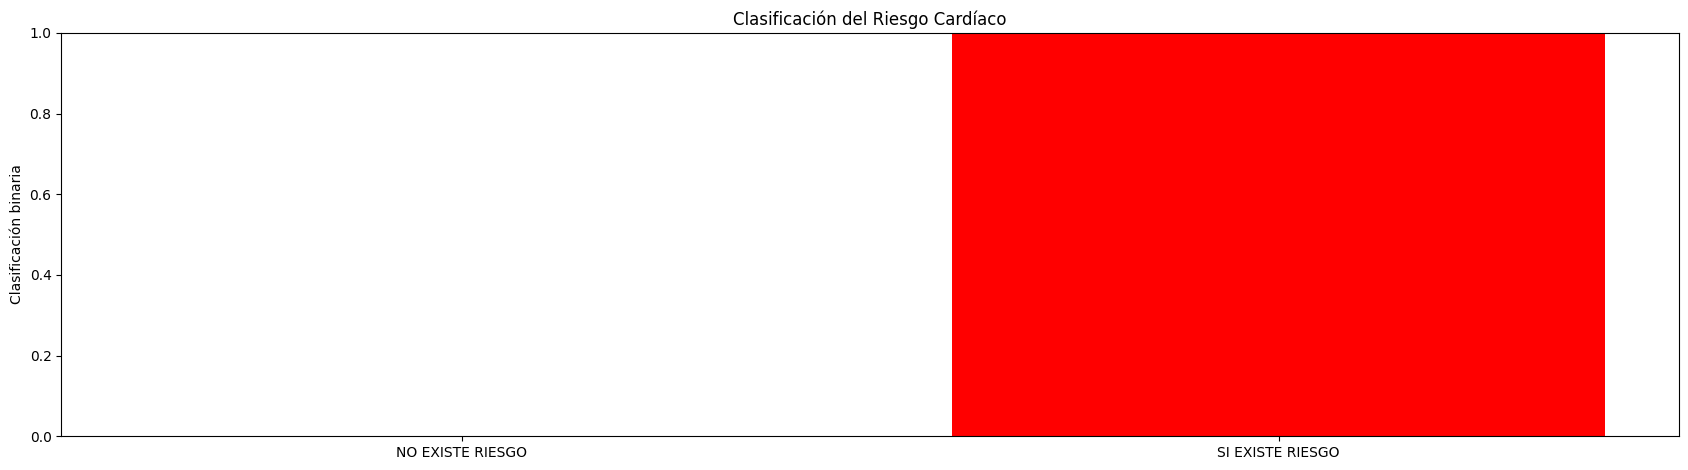

In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyQt5.QtWidgets import (
    QApplication, QMainWindow, QWidget, QVBoxLayout, QHBoxLayout, QPushButton,
    QLabel, QComboBox, QTableWidget, QTableWidgetItem, QScrollArea,
    QSizePolicy, QFileDialog
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont, QPixmap, QColor
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import joblib
from fpdf import FPDF
import unicodedata

df = pd.read_csv("HeartAttackPredictionIndia_Updated.csv")
model = joblib.load("modelo_xgboost.pkl")
scaler = joblib.load("scaler.pkl")
input_cols = joblib.load("columnas_modelo.pkl")

factores_riesgo = [
    'Hypertension', 'Diabetes', 'Obesity', 'Family_History', 'Smoking',
    'Alcohol_Consumption', 'Air_Pollution_Exposure', 'Cond_Colesterol_Alto',
    'Cond_Tension_Sistolica', 'Cond_Tension_Diastolica', 'Cond_Dieta_Mala',
    'Cond_Estres_Alto', 'Cond_Edad_Avanzada'
]

df = df.drop(columns=['High_Clinical_Risk', 'State_Name', 'Heart_Attack_Risk'], errors='ignore')
df_dummies = pd.get_dummies(df, drop_first=True)
X = df_dummies.reindex(columns=input_cols, fill_value=0)
X_scaled = scaler.transform(X)
unique_ids = [str(i + 1) for i in df.index]

class MplCanvas(FigureCanvas):
    def __init__(self, parent=None):
        self.fig, self.ax = plt.subplots()
        super().__init__(self.fig)
        self.setParent(parent)

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Sistema de Predicción de Riesgo Cardiovascular mediante Inteligencia Artificial")
        self.setGeometry(100, 100, 1300, 900)

        main_widget = QWidget()
        main_layout = QVBoxLayout(main_widget)
        self.setCentralWidget(main_widget)

        header_widget = QWidget()
        header_widget.setStyleSheet("background-color: #0060AF; border-radius: 8px;")
        header_layout = QHBoxLayout(header_widget)

        logo = QLabel()
        pixmap = QPixmap("uax_logo.png")
        logo.setPixmap(pixmap.scaledToHeight(120))
        header_layout.addWidget(logo)

        title = QLabel("Sistema de Predicción de Riesgo Cardiovascular\n mediante Inteligencia Artificial")
        title.setFont(QFont('Arial', 20, QFont.Bold))
        title.setStyleSheet("color: white;")
        title.setAlignment(Qt.AlignCenter)
        header_layout.addWidget(title)
        header_layout.setStretch(1, 2)

        main_layout.addWidget(header_widget)

        top_layout = QHBoxLayout()
        label = QLabel("Selecciona un paciente:")
        label.setFont(QFont('Arial', 12))
        top_layout.addWidget(label)

        self.combo = QComboBox()
        self.combo.addItems(unique_ids)
        self.combo.setFixedWidth(200)
        top_layout.addWidget(self.combo)

        predict_button = QPushButton("Predecir")
        predict_button.clicked.connect(self.predict)
        top_layout.addWidget(predict_button)

        save_button = QPushButton("Guardar PDF")
        save_button.clicked.connect(self.guardar_pdf)
        top_layout.addWidget(save_button)

        exit_button = QPushButton("Salir")
        exit_button.clicked.connect(self.close)
        top_layout.addWidget(exit_button)

        main_layout.addLayout(top_layout)

        scroll = QScrollArea()
        scroll.setWidgetResizable(True)
        main_layout.addWidget(scroll)

        self.content = QWidget()
        self.layout = QVBoxLayout(self.content)
        scroll.setWidget(self.content)

        self.prediccion_actual = ""
        self.paciente_actual = ""
        self.current_plot_path = "temp_plot.png"
        self.table_data = None
        self.factores = []

    def predict(self):
        self.clear_layout()

        idx = int(self.combo.currentText()) - 1
        row = X_scaled[idx].reshape(1, -1)
        prob = model.predict_proba(row)[0][1]
        pred = int(prob > 0.5)

        self.prediccion_actual = f"{'SI EXISTE RIESGO' if pred else 'NO EXISTE RIESGO'}"
        self.paciente_actual = idx + 1

        label_result = QLabel(f"🧠 Identificación Riesgo Cardíaco: {'SI EXISTE RIESGO' if pred else 'NO EXISTE RIESGO'}")
        label_result.setFont(QFont('Arial', 16, QFont.Bold))
        label_result.setAlignment(Qt.AlignCenter)
        label_result.setStyleSheet("color: red;" if pred else "color: green;")
        self.layout.addWidget(label_result)

        # Factores de riesgo
        fila = df.iloc[idx]
        factores_activos = [f for f in factores_riesgo if f in fila.index and fila[f] == 1]
        self.factores = factores_activos
        if len(factores_activos) >= 6:
            label_factores = QLabel(f"⚠️ Riesgo alto detectado por presencia de {len(factores_activos)} factores:\n" + ", ".join(factores_activos))
            label_factores.setWordWrap(True)
            label_factores.setFont(QFont('Arial', 10, QFont.Bold))
            label_factores.setAlignment(Qt.AlignCenter)
            label_factores.setStyleSheet("color: black;")
            self.layout.addWidget(label_factores)

        fila = df.iloc[idx]
        factores_activos = [f for f in factores_riesgo if f in fila.index and fila[f] == 1]
        self.factores = factores_activos

        raw_row = df.iloc[idx].drop('Heart_Attack_Risk', errors='ignore')
        self.table_data = raw_row

        table = QTableWidget(1, len(raw_row))
        table.setHorizontalHeaderLabels([str(c).replace('_', ' ') for c in raw_row.index])
        for j, val in enumerate(raw_row.values):
            item = QTableWidgetItem(str(val))
            item.setTextAlignment(Qt.AlignCenter)
            item.setFont(QFont('Arial', 9))
            if j % 2 == 0:
                item.setBackground(QColor("#EAF2F8"))
            table.setItem(0, j, item)

        table.setStyleSheet("QHeaderView::section { font-weight: bold; background-color: #D6EAF8; }")
        table.resizeColumnsToContents()
        table.setMaximumHeight(100)
        self.layout.addWidget(table)

        canvas = MplCanvas(self)
        canvas.ax.bar(["NO EXISTE RIESGO", "SI EXISTE RIESGO"], [int(not pred), int(pred)], color=["green", "red"])
        canvas.ax.set_title("Clasificación del Riesgo Cardíaco")
        canvas.ax.set_ylim(0, 1)
        canvas.ax.set_ylabel("Clasificación binaria")
        canvas.fig.tight_layout()
        canvas.fig.savefig(self.current_plot_path)
        self.layout.addWidget(canvas)

        recomendaciones = {
            'Hypertension': "🩺 Controla la presión arterial con dieta baja en sal.",
            'Diabetes': "🍭 Controla la glucosa con dieta y ejercicio.",
            'Obesity': "⚖️ Mantén un peso saludable con actividad regular.",
            'Family_History': "👪 Realiza chequeos médicos periódicos.",
            'Smoking': "🚭 Abandona el tabaco lo antes posible.",
            'Alcohol_Consumption': "🥂 Modera el consumo de alcohol.",
            'Air_Pollution_Exposure': "🌫️ Evita ambientes contaminados.",
            'Cond_Colesterol_Alto': "🥑 Reduce grasas saturadas y azúcares.",
            'Cond_Tension_Sistolica': "💓 Controla tu presión con revisiones.",
            'Cond_Tension_Diastolica': "💤 Evita estrés y duerme bien.",
            'Cond_Dieta_Mala': "🥗 Mejora tu alimentación.",
            'Cond_Estres_Alto': "🧘‍♂️ Relájate, despeja la mente, y haz ejercicio.",
            'Cond_Edad_Avanzada': "👴 Mantén controles médicos frecuentes."
        }

        recomendaciones_activas = [recomendaciones[f] for f in factores_activos if f in recomendaciones]
        texto_recomendaciones = "\n\n".join(recomendaciones_activas)
        label_recom = QLabel("📝 <b>Recomendaciones personalizadas:</b><br><br>" + texto_recomendaciones.replace("\n", "<br>"))
        label_recom.setWordWrap(True)
        label_recom.setFont(QFont('Arial', 10))
        label_recom.setStyleSheet("background-color: #FDF2E9; border: 1px solid #F5CBA7; padding: 10px;")
        self.layout.addWidget(label_recom)

        self.recomendaciones_texto = texto_recomendaciones

    def guardar_pdf(self):
        if self.paciente_actual == "":
            return

        options = QFileDialog.Options()
        path, _ = QFileDialog.getSaveFileName(
            self,
            "Guardar informe",
            f"prediccion_paciente_{self.paciente_actual}.pdf",
            "PDF Files (*.pdf)",
            options=options
        )

        if not path:
            return

        if not path.lower().endswith(".pdf"):
            path += ".pdf"

        # Función para eliminar emojis y caracteres no latin-1
        def limpiar_texto(texto):
            texto_sin_emojis = ''.join(
                c for c in texto if unicodedata.category(c)[0] != "C" and ord(c) < 256
            )
            return texto_sin_emojis.replace('\r\n', '\n').replace('\r', '\n')

        pdf = FPDF()
        pdf.add_page()
        try:
            pdf.image("uax_logo.png", x=10, y=8, w=30)
        except RuntimeError:
            pass

        pdf.set_xy(50, 10)
        pdf.set_font("Arial", 'B', 14)
        pdf.multi_cell(140, 8, limpiar_texto("Sistema de Predicción de Riesgo Cardiovascular"), align='C')
        pdf.set_x(50)
        pdf.multi_cell(140, 8, limpiar_texto("mediante Inteligencia Artificial"), align='C')

        pdf.ln(15)
        pdf.set_font("Arial", 'B', 14)
        pdf.cell(0, 10, "INFORME COMPLETO", ln=True)
        pdf.set_font("Arial", size=12)
        pdf.cell(0, 10, f"ID del paciente: {self.paciente_actual}", ln=True)
        pdf.cell(0, 10, f"Predicción de riesgo: {limpiar_texto(self.prediccion_actual)}", ln=True)
        pdf.ln(10)

        if self.factores:
            pdf.set_font("Arial", 'B', 12)
            pdf.cell(0, 10, "Factores de riesgo presentes:", ln=True)
            pdf.set_font("Arial", size=10)
            pdf.multi_cell(0, 8, limpiar_texto(", ".join(self.factores)))
            pdf.ln(5)

        if self.table_data is not None:
            pdf.set_font("Arial", 'B', 12)
            pdf.cell(0, 10, "Datos del paciente:", ln=True)
            pdf.set_font("Arial", size=10)
            for i, (col, val) in enumerate(self.table_data.items()):
                texto = f"{col.replace('_', ' ')}: {val}"
                pdf.cell(90, 8, limpiar_texto(texto), ln=i % 2 == 1)
            pdf.ln(10)

        if self.current_plot_path:
            try:
                pdf.add_page() 
                pdf.set_font("Arial", 'B', 12)
                pdf.ln(5)
                pdf.cell(0, 10, "Gráfico de clasificación:", ln=True)
                pdf.ln(5)
                pdf.image(self.current_plot_path, x=50, w=100)
            except RuntimeError:
                pass
        
        if hasattr(self, "recomendaciones_texto") and self.recomendaciones_texto:
            pdf.set_font("Arial", 'B', 12)
            pdf.cell(0, 10, "Recomendaciones personalizadas:", ln=True)
            pdf.set_font("Arial", size=10)
            pdf.multi_cell(0, 8, limpiar_texto(self.recomendaciones_texto))
            pdf.ln(5)

        try:
            pdf.output(path)
        except Exception as e:
            print(f"Error al guardar el PDF: {e}")


    def clear_layout(self):
        for i in reversed(range(self.layout.count())):
            widget_to_remove = self.layout.itemAt(i).widget()
            self.layout.removeWidget(widget_to_remove)
            widget_to_remove.deleteLater()

if __name__ == "__main__":
    app = QApplication(sys.argv)
    main_win = MainWindow()
    main_win.show()
    sys.exit(app.exec_())